# Imports & Installs

In [19]:
pip install mlxtend --upgrade

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [20]:
#!pip install mlxtend
# estimate the bias and variance for a regression model
from pandas import read_csv
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, Ridge,Lasso
from mlxtend.evaluate import bias_variance_decomp
import matplotlib.pyplot as plt
import pandas as pd

from sklearn.preprocessing import PolynomialFeatures


# Calculate the bias and variance for linear regression model.
Used dataset: BostonHousing.csv

In [21]:
boston=pd.read_csv('BostonHousing.csv')
print (boston)

        CRIM    ZN  INDUS  CHAS    NOX     RM   AGE     DIS  RAD  TAX  \
0    0.00632  18.0   2.31     0  0.538  6.575  65.2  4.0900    1  296   
1    0.02731   0.0   7.07     0  0.469  6.421  78.9  4.9671    2  242   
2    0.02729   0.0   7.07     0  0.469  7.185  61.1  4.9671    2  242   
3    0.03237   0.0   2.18     0  0.458  6.998  45.8  6.0622    3  222   
4    0.06905   0.0   2.18     0  0.458  7.147  54.2  6.0622    3  222   
..       ...   ...    ...   ...    ...    ...   ...     ...  ...  ...   
501  0.06263   0.0  11.93     0  0.573  6.593  69.1  2.4786    1  273   
502  0.04527   0.0  11.93     0  0.573  6.120  76.7  2.2875    1  273   
503  0.06076   0.0  11.93     0  0.573  6.976  91.0  2.1675    1  273   
504  0.10959   0.0  11.93     0  0.573  6.794  89.3  2.3889    1  273   
505  0.04741   0.0  11.93     0  0.573  6.030  80.8  2.5050    1  273   

     PTRATIO       B  LSTAT  PRICE  
0       15.3  396.90   4.98   24.0  
1       17.8  396.90   9.14   21.6  
2       17.8

In [22]:
from sklearn.linear_model import LinearRegression
data = boston.values
X = data[:, 4:9]

Y=boston.PRICE
print (Y)

0      24.0
1      21.6
2      34.7
3      33.4
4      36.2
       ... 
501    22.4
502    20.6
503    23.9
504    22.0
505    11.9
Name: PRICE, Length: 506, dtype: float64


In [23]:
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.25, random_state=1)
X_train.shape

(379, 5)

In [24]:
from sklearn.preprocessing import PolynomialFeatures
from mlxtend.evaluate import bias_variance_decomp
def transform_x(x, order):
    poly = PolynomialFeatures(order)
    return poly.fit_transform(x)

orderlist = [1,2,3]
mselist=biaslist=varlist=[]
for order in orderlist:
    X_train_trans = transform_x(X_train, order = order)
    X_test_trans = transform_x(X_test, order = order)
    # define the model
    model = LinearRegression()
    # estimate bias and variance
    mse, bias, var = bias_variance_decomp(model, X_train_trans, y_train.values, X_test_trans, y_test.values, loss='mse', num_rounds=200, random_seed=1)
    # summarize results
    print(' MSE: %.3f, Bias: %.3f,Variance: %.3f ' % (mse,bias,var))
    #print('' % bias)
    #print('' % var)
    mselist=mselist+ [mse]
    biaslist= biaslist+ [bias]
    varlist= varlist+ [var]

 MSE: 35.251, Bias: 34.472,Variance: 0.779 
 MSE: 28.455, Bias: 26.184,Variance: 2.271 
 MSE: 57.277, Bias: 26.304,Variance: 30.973 


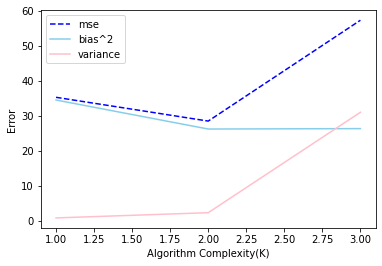

In [25]:
plt.plot(range(1,4), mselist, 'blue', label = 'mse',linestyle='dashed')
plt.plot(range(1,4), biaslist, 'skyblue', label = 'bias^2')
plt.plot(range(1,4), varlist, 'pink', label = 'variance')
plt.xlabel('Algorithm Complexity(K)')
plt.ylabel('Error')
plt.legend()

# Assigment
## Try for order 5 and 6 in expression and plot the order(complexity) wise error.

In [26]:
from sklearn.preprocessing import PolynomialFeatures
from mlxtend.evaluate import bias_variance_decomp
def transform_x(x, order):
    poly = PolynomialFeatures(order)
    return poly.fit_transform(x)

orderlist = [5,6]
mselist=biaslist=varlist=[]
for order in orderlist:
    X_train_trans = transform_x(X_train, order = order)
    X_test_trans = transform_x(X_test, order = order)
    # define the model
    model = LinearRegression()
    # estimate bias and variance
    mse, bias, var = bias_variance_decomp(model, X_train_trans, y_train.values, X_test_trans, y_test.values, loss='mse', num_rounds=200, random_seed=1)
    # summarize results
    print(' MSE: %.3f, Bias: %.3f,Variance: %.3f ' % (mse,bias,var))
    #print('' % bias)
    #print('' % var)
    mselist=mselist+ [mse]
    biaslist= biaslist+ [bias]
    varlist= varlist+ [var]

 MSE: 297705.581, Bias: 7654.728,Variance: 290050.853 
 MSE: 685667.761, Bias: 13442.848,Variance: 672224.913 


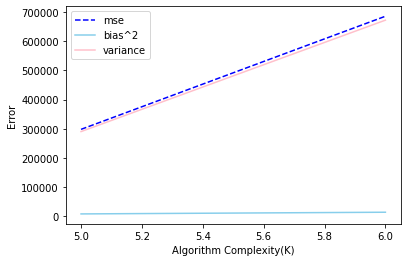

In [27]:
plt.plot(range(5,7), mselist, 'blue', label = 'mse',linestyle='dashed')
plt.plot(range(5,7), biaslist, 'skyblue', label = 'bias^2')
plt.plot(range(5,7), varlist, 'pink', label = 'variance')
plt.xlabel('Algorithm Complexity(K)')
plt.ylabel('Error')
plt.legend()

# Ridge regression and lasso regression
Lasso Regression is a popular type of regularized linear regression that includes an L1 penalty. This has the effect of shrinking the coefficients for those input variables that do not contribute much to the prediction task.

In [28]:
from sklearn.linear_model import (LinearRegression, Ridge, Lasso)
x = boston.drop('PRICE', axis = 1)

y=boston.PRICE
print (y)

# This creates a LinearRegression object
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.20, random_state=1)

lasso = Lasso(alpha=0.1, max_iter=100, normalize=True)

# Fit the regressor to the data
lasso.fit(x_train,y_train)

# Compute and print the coefficients
lasso_coef = lasso.coef_
print(lasso_coef)

0      24.0
1      21.6
2      34.7
3      33.4
4      36.2
       ... 
501    22.4
502    20.6
503    23.9
504    22.0
505    11.9
Name: PRICE, Length: 506, dtype: float64
[-0.          0.         -0.          0.         -0.          2.4482939
 -0.          0.         -0.         -0.         -0.37642235  0.
 -0.45973067]


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_base.py:145: FutureWarning: 'normalize' was deprecated in version 1.0 and will be removed in 1.2.
If you wish to scale the data, use Pipeline with a StandardScaler in a preprocessing stage. To reproduce the previous behavior:

from sklearn.pipeline import make_pipeline

model = make_pipeline(StandardScaler(with_mean=False), Lasso())

If you wish to pass a sample_weight parameter, you need to pass it as a fit parameter to each step of the pipeline as follows:

kwargs = {s[0] + '__sample_weight': sample_weight for s in model.steps}
model.fit(X, y, **kwargs)

Set parameter alpha to: original_alpha * np.sqrt(n_samples). 
  FutureWarning,


In [29]:
from numpy import mean
from numpy import std
from numpy import absolute
from sklearn.model_selection import RepeatedKFold, cross_val_score
data = boston.values
X, y = data[:, :-1], data[:, -1]
# define model
model = Lasso(alpha=1.0)
# define model evaluation method
cv = RepeatedKFold(n_splits=10, n_repeats=3, random_state=1)
# evaluate model
scores = cross_val_score(model, X, y, scoring='neg_mean_absolute_error', cv=cv, n_jobs=-1)
print (scores)
# force scores to be positive
scores = absolute(scores)
print('Mean of absolute error: %.3f (%.3f)' % (mean(scores), std(scores)))

[-3.97729331 -4.4832389  -2.65657973 -4.61956645 -3.11497716 -3.66077912
 -3.14406887 -4.17307844 -4.17961856 -3.04413442 -2.93179756 -4.32898958
 -3.73380052 -4.11543216 -4.0763642  -3.34125214 -4.57608963 -3.87425594
 -3.34546187 -2.94548797 -3.48820017 -3.24560904 -3.61743117 -3.81641985
 -4.55939227 -3.80887108 -3.7710108  -4.32500373 -3.10886541 -3.26472564]
Mean of absolute error: 3.711 (0.549)


# L2 or ridge regression

In [30]:
model1 = Ridge(alpha=1)
# define model evaluation method
cv = RepeatedKFold(n_splits=10, n_repeats=3, random_state=1)
# evaluate model
scores1 = cross_val_score(model1, X, y, scoring='neg_mean_absolute_error', cv=cv, n_jobs=-1)
print (scores1)
# force scores to be positive
scores1 = absolute(scores1)
print('Mean of absolute error and the standard deviation will become: %.3f (%.3f)' % (mean(scores1), std(scores1)))

[-3.68665655 -3.69949707 -2.27418791 -4.47534809 -2.65623368 -3.3268799
 -3.05433457 -3.89214328 -3.85509401 -2.81233784 -2.70449675 -4.18052658
 -3.34038144 -3.49306949 -3.38194947 -3.15557217 -4.23368238 -3.51046837
 -3.39181011 -2.72686174 -3.2293621  -2.81979252 -3.2054039  -3.80138383
 -4.14962312 -3.51704625 -3.54564    -3.55084967 -2.87993716 -2.90703723]
Mean of absolute error and the standard deviation will become: 3.382 (0.519)


# Polynomial regression
used dataset:**winequality-red.csv**

In [31]:
wine_data=pd.read_csv('/content/winequality-red.csv')
print (wine_data)

      fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0               7.4             0.700         0.00             1.9      0.076   
1               7.8             0.880         0.00             2.6      0.098   
2               7.8             0.760         0.04             2.3      0.092   
3              11.2             0.280         0.56             1.9      0.075   
4               7.4             0.700         0.00             1.9      0.076   
...             ...               ...          ...             ...        ...   
1594            6.2             0.600         0.08             2.0      0.090   
1595            5.9             0.550         0.10             2.2      0.062   
1596            6.3             0.510         0.13             2.3      0.076   
1597            5.9             0.645         0.12             2.0      0.075   
1598            6.0             0.310         0.47             3.6      0.067   

      free sulfur dioxide  

In [32]:
wine_data.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [33]:
target = wine_data['quality']
print (target)

0       5
1       5
2       5
3       6
4       5
       ..
1594    5
1595    6
1596    6
1597    5
1598    6
Name: quality, Length: 1599, dtype: int64


In [34]:
source = wine_data.drop(["quality"],axis=1)
source.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4


In [35]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(source, target, test_size=0.25,random_state=1)
poly_features = PolynomialFeatures(degree= 2)
X_train_poly = poly_features.fit_transform(X_train)
   
# fit the transformed features to Linear Regression
poly_model = LinearRegression()

poly_model.fit(X_train_poly, y_train)
     
# predicting on training data-set
y_train_predicted = poly_model.predict(X_train_poly)
   
# predicting on test data-set
y_test_predicted = poly_model.predict(poly_features.fit_transform(X_test))



In [36]:
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
import numpy as np


print('MSE:',mean_squared_error(y_test, y_test_predicted))
print('RMSE:',np.sqrt(mean_squared_error(y_test, y_test_predicted)))

MSE: 0.404785174109616
RMSE: 0.6362272975200105


# Assignment
### Build the polynomial regression model for degree 4 in the polynomial equation for some features and calculate the **MSE** and **RMSE**
and also explore the model with some necessary features such as $$x_{1}, x_{2}, x_{3}..... $$

here PolynomialFeatures(**degree**= 4)
  $$ Y= θ_{0} +θ_{1}x_{1} + θ_{2}x_{2}^{2}+θ_{3} x_{1}x_{2}+...... $$

In [37]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(source, target, test_size=0.25,random_state=1)
poly_features = PolynomialFeatures(degree= 4)
X_train_poly = poly_features.fit_transform(X_train)
   
# fit the transformed features to Linear Regression
poly_model = LinearRegression()

poly_model.fit(X_train_poly, y_train)
     
# predicting on training data-set
y_train_predicted = poly_model.predict(X_train_poly)
   
# predicting on test data-set
y_test_predicted = poly_model.predict(poly_features.fit_transform(X_test))



In [38]:
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
import numpy as np


print('MSE:',mean_squared_error(y_test, y_test_predicted))
print('RMSE:',np.sqrt(mean_squared_error(y_test, y_test_predicted)))

MSE: 39056.48815249236
RMSE: 197.62714427044773
